В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import drive


In [2]:
drive.mount('/content/drive')
medical_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/medical_charges/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']

Mounted at /content/drive


In [10]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

X_b = np.c_[np.ones((len(X), 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_mnk = theta_best[0]
coef_mnk = theta_best[1]

y_pred_mnk = X_b.dot(theta_best)

rmse_mnk = np.sqrt(mean_squared_error(y, y_pred_mnk))

print(f"--- 1. МНК (Numpy) ---")
print(f"Коефіцієнти: w = {coef_mnk:.4f}, b = {intercept_mnk:.4f}")
print(f"RMSE: {rmse_mnk:.4f}")
print(f"Перші 5 прогнозів (y_pred_mnk): {y_pred_mnk[:5]}")

--- 1. МНК (Numpy) ---
Коефіцієнти: w = 267.2489, b = -2091.4206
RMSE: 4662.5058
Перші 5 прогнозів (y_pred_mnk): [2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]



=== 2. Градієнтний спуск (Тестування Learning Rates) ===
LR=0.0001: w = 222.1535, b = -88.5667, RMSE = 4710.9816
LR=0.0005: w = 229.5927, b = -418.9697, RMSE = 4696.3599
LR=0.001: Розійшовся (RMSE = inf)


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3738109220.py:14: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y)**2)
/tmp/ipython-input-3738109220.py:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - lr * gradients


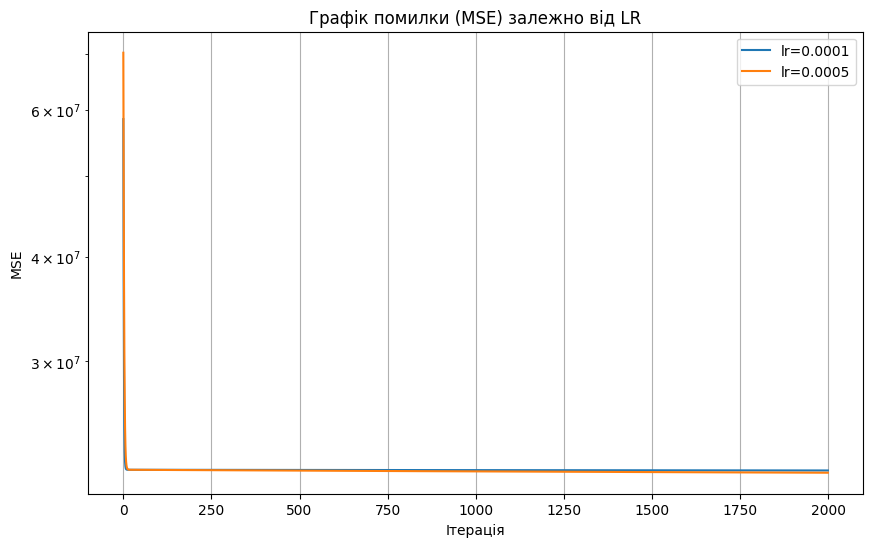


>> Найкращий результат GD: LR=0.0005
Коефіцієнти: w = 229.5927, b = -418.9697
RMSE: 4696.3599
--> Прогнози збережено в змінну 'y_pred_gd'. Перші 5 значень: [3713.69888434 6009.6258933  7157.58939779 6927.99669689 6698.40399599]


In [17]:
def gradient_descent(X, y, lr=0.001, epochs=2000):
    m = len(y)
    theta = np.random.randn(2, 1)
    X_b = np.c_[np.ones((len(X), 1)), X]
    y = y.reshape(-1, 1)

    loss_history = []

    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients

        y_pred = X_b.dot(theta)
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)

    return theta, loss_history

print(f"\n=== 2. Градієнтний спуск (Тестування Learning Rates) ===")

learning_rates = [0.0001, 0.0005, 0.001]
best_rmse = float('inf')
best_theta = None
best_lr = None
best_loss_history = []

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    theta, losses = gradient_descent(X, y, lr=lr, epochs=2000)

    if np.isnan(losses[-1]):
        print(f"LR={lr}: Розійшовся (RMSE = inf)")
        continue

    X_b_temp = np.c_[np.ones((len(X), 1)), X]
    y_pred_temp = X_b_temp.dot(theta).flatten()
    current_rmse = np.sqrt(mean_squared_error(y, y_pred_temp))

    print(f"LR={lr}: w = {theta[1][0]:.4f}, b = {theta[0][0]:.4f}, RMSE = {current_rmse:.4f}")

    plt.plot(losses, label=f'lr={lr}')

    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_theta = theta
        best_lr = lr
        best_loss_history = losses

plt.title('Графік помилки (MSE) залежно від LR')
plt.xlabel('Ітерація')
plt.ylabel('MSE')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

X_b_final = np.c_[np.ones((len(X), 1)), X]
y_pred_gd = X_b_final.dot(best_theta).flatten()

coef_gd = best_theta[1][0]
intercept_gd = best_theta[0][0]

print(f"\n>> Найкращий результат GD: LR={best_lr}")
print(f"Коефіцієнти: w = {coef_gd:.4f}, b = {intercept_gd:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"--> Прогнози збережено в змінну 'y_pred_gd'. Перші 5 значень: {y_pred_gd[:5]}")

In [18]:
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)

coef_sk = lin_reg.coef_[0]
intercept_sk = lin_reg.intercept_

y_pred_sk = lin_reg.predict(X_reshaped)
rmse_sk = np.sqrt(mean_squared_error(y, y_pred_sk))

print(f"\n=== 3. Scikit-learn ===")
print(f"Коефіцієнти: w = {coef_sk:.4f}, b = {intercept_sk:.4f}")
print(f"RMSE: {rmse_sk:.4f}")
print(f"--> Прогнози збережено в змінну 'y_pred_sk'. Перші 5 значень: {y_pred_sk[:5]}")



=== 3. Scikit-learn ===
Коефіцієнти: w = 267.2489, b = -2091.4206
RMSE: 4662.5058
--> Прогнози збережено в змінну 'y_pred_sk'. Перші 5 значень: [2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]


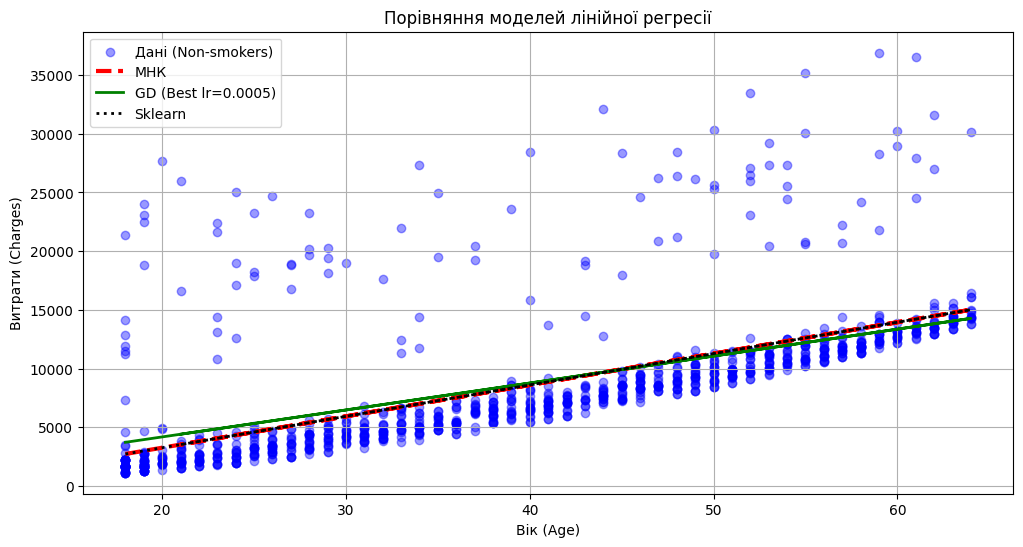

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.4, label='Дані (Non-smokers)')

plt.plot(X, y_pred_mnk, color='red', linestyle='--', linewidth=3, label='МНК')
plt.plot(X, y_pred_gd, color='green', linestyle='-', linewidth=2, label=f'GD (Best lr={best_lr})')
plt.plot(X, y_pred_sk, color='black', linestyle=':', linewidth=2, label='Sklearn')

plt.title('Порівняння моделей лінійної регресії')
plt.xlabel('Вік (Age)')
plt.ylabel('Витрати (Charges)')
plt.legend()
plt.grid(True)
plt.show()

1. МНК (Numpy) та Scikit-learn:Результати абсолютно ідентичні ($w \approx 267.25$, $b \approx -2091.42$, RMSE $\approx 4662.5$).
Градієнтний спуск (GD):Результати відрізняються від ідеальних ($w \approx 229.6$, $b \approx -419.0$, RMSE $\approx 4696.4$).Хоча точність прогнозу (RMSE) наблизилася до ідеальної (4696 проти 4662), самі коефіцієнти ($w$ і $b$) ще не зійшлися до кінця.

2. Аналіз швидкості навчання (Learning Rate):LR = 0.0005: Виявився найкращим серед протестованих. Він забезпечив стабільне зменшення помилки.
3. Інтерпретація знайдених параметрів:Нахил ($w \approx 267.25$): Це означає, що для некурців кожен додатковий рік віку збільшує вартість річної страховки в середньому на $267.25.


В попередньому д/з мої прогнози були близькими ($w \approx 250$, $b \approx -2500$, RMSE $\approx 4714$).


---



 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

--- Модель для курців (Smokers) ---
Коефіцієнти: w = 305.2376, b = 20294.1281
RMSE: 10711.0033


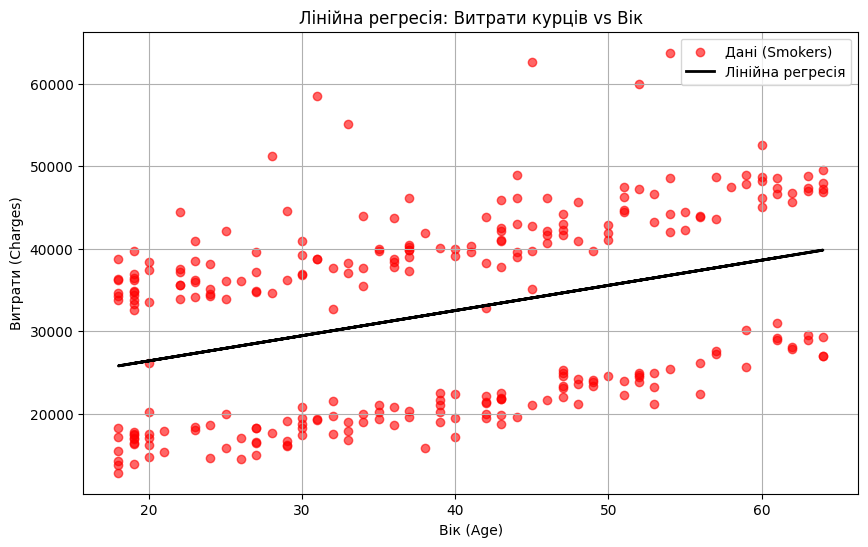

In [22]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']

X_smoker = smoker_df['age'].values.reshape(-1, 1)
y_smoker = smoker_df['charges'].values

lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker, y_smoker)

coef_smoker = lin_reg_smoker.coef_[0]
intercept_smoker = lin_reg_smoker.intercept_
y_pred_smoker = lin_reg_smoker.predict(X_smoker)

rmse_smoker = np.sqrt(mean_squared_error(y_smoker, y_pred_smoker))

print(f"--- Модель для курців (Smokers) ---")
print(f"Коефіцієнти: w = {coef_smoker:.4f}, b = {intercept_smoker:.4f}")
print(f"RMSE: {rmse_smoker:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='red', alpha=0.6, label='Дані (Smokers)')
plt.plot(X_smoker, y_pred_smoker, color='black', linewidth=2, label='Лінійна регресія')

plt.title('Лінійна регресія: Витрати курців vs Вік')
plt.xlabel('Вік (Age)')
plt.ylabel('Витрати (Charges)')
plt.legend()
plt.grid(True)
plt.show()

Точність моделі:RMSE ≈ 10711.0.Це означає, що модель помиляється в середньому на 10,711. Це дуже велика похибка, особливо якщо порівняти з моделлю для некурців (там помилка була ~4662).

Коефіцієнти: $w \approx 305.24$: З віком витрати курців зростають ще стрімкіше, ніж у некурців (305 доларів за рік проти 267). $b \approx 20294.13$: Стартова ціна страховки для курця є величезною — понад 20 тисяч доларів (у некурців цей параметр був від'ємним). Тобто саме факт куріння додає колосальну базову вартість.

Цю модель не можна використовувати в компанії як єдиний інструмент.На графіку точки розділилися на дві чіткі групи: одна група йде нижче лінії, а інша — вище. Лінійна регресія намагається пройти посередині, але в результаті погано описує обидві групи. Ймовірно, існує ще один прихований фактор (наприклад, ожиріння / BMI), який розділяє курців на "дорогих" і "дуже дорогих". Проста модель "тільки за віком" ігнорує цей фактор і тому дає неприпустимо велику похибку.